# Building a framework for exploratory Geophysical Fluid Dynamics: A test-case with Lid-Driven Cavity Flows
### Spring 2025, created by: Dylan Joseph Roy-Leo


## Table of Contents
1. Introduction: Motivation & Background
2. Governing Equations & Numerical Methods
3. Python Implementation
    - Initialization
    - Boundary Conditions
    - Solver Functions
    - Time Integration
4. Results & Visualization
5. Data Analysis & Discussion
6. References

## 1. Introduction

#### Interest in GFD

Salt marshes are incredibly important ecosystems for many coastal communities around the world. Among the many services that they provide, the one of relevance to me is their ability to buffer shorelines against relative sea level rise (RSLR) and prevent the erosion of coastal sedimentary cliffs. However, salt marshes require a yearly sediment budget, potentially transported through the marshes connection with the sea as sediment is carried in with the tide, or potentially transported via rivers that connect to the marsh and periodically dump massive amounts of sediment directly onto the marsh platform after large storm events. As for the first avenue of sediment transport, the open ocean, there are limited sources to where that sediment can come from. Either, the sediment came originally from a river and travelled to the open ocean where coastal currents carried it back into a marsh, the sediment was resuspended from the ocean shelf by a large storm, or the sediment was directly eroded from the land (most likely by a large storm event) and transported to the marsh via coastal currents. The easiest of those three possibilities to probe, and the topic of my Master's thesis, is the last. I'm interested in how sediment eroded from coastal landforms called bluffs is transported from the site of erosion by coastal currents, and my big question is "how much of the sediment eroded from bluffs gets deposited on the marsh surface?".

The first part of my Master's thesis was focused on quantifying the volume and mass of fine-grain sediment eroded from the coast via combining LiDAR differencing with Surficial Geology data. The results from that work proved to be interesting, but not satisfying. I was able to show that bluff erosion supplied more than enough sediment between 2011 and 2021 in Massachusetts to the coastal zone than what all marshes in Massachusetts would require within that same time frame. This is not what we expected, and shows that bluff erosion may be a significant contributor in marsh sustenance.

However, there is a problem. For none of the eroded sediment that I was able to document, *none of it*, was I able to say made it way to a marsh platform. Let alone deposited and contributed to its accretion. Once sediment is eroded from the coast, its a black box, with the methods I had at my diposal I was not able to say that even a single kilogram made its way to a marsh. And in fact, in some areas where eroded bluff were further downstream in a littoral cell from a marsh, you could pretty confidently say that the sediment from particular bluff would *never* make it to a particular marsh. To me, this highlighted the pressing need to find a method that would allow you to make predictions about the incredibly complex nature of coastal currents, and the sediment suspended therein.

With that said salt marshes are inherently dynamical systems. Their very nature is tied, at the very least, to the daily cycle of tides which pushes massives amounts of fluid onto the marsh surface. This water interacts in complex and mostly unknown ways with topology of the marsh and with the vegetation on the marsh. The mechanics of how coastal waters flow over the marsh surface, and how that flow impacts marsh characteristics such as sediment delivery, is an incredibly complex topic. Three-dimensional fluid mechanic models such as the Finite Volume Community Ocean Model (FVCOM) are as close as we have to understanding the meso-scale dynamics of marsh ecosystems. These models have given us valuable insights into how salinity, temperature, and suspended sediment are transported in a marsh.

Enter Geophysical Fluid Dynamics. One of the more fascinating and tempting subjects I've encountered in a long time, GFD is the study and pursuit of modelling the fluid dynamics of planet earth. This can include atmospheric GFD where weather patterns and atmospheric circulations are studied, and it can also include physical oceanography were ocean currents at both large and small scale are studied. There are other brands of fluid dynamics as well, including Computational Fluid Dynamics, and in many ways they all feed into one another. GFD is particularly interesting to me not just becuase it might allow me an avenue to answer my Thesis questions, but also becuase I've come to recognize the particular strength that GFD holds within the realm of fluid dynamics. And that strength is its vast complexity. Geophysical systems are noisy, irregular, and can have upwards of infinite degrees of freedom, and these facts can make it incredibly difficult to model geophysical systems. However, in the same token, GFD is incredibly rich and has a vast wealth of untapped potential. In combination with advances in both the field of data driven science and engineering as well as remote sensing, I believe GFD has more to offer than ever, highlighting my fervent interest in diving head-first into this subject.

#### Motivations for this project
As I've spent around the past year or so diving into GFD, one thing that always irked me was my inability to model the systems I was learning about. I assumed that as I became more familiar with the theoretical foundation of solving the PDEs required to model fluid flow, and as I became more competent in the algorithmic methods used to translate continuous mathematics to discrete machines, that I would slowly be able to model more and more systems, finally giving me the hands-on experience I was craving from this field. This . . . sort of, came to pass. Watching YouTube tutorials online its pretty easy to boot up Python or Matlab and follow the guide step-by-step to get a working model of some rudimentary system. However, as I came to find, this had limited applicability when it came to hands-on learning. The reason for that is that when I built these models, I wanted to mess with everything, all the parameters, all the modules, all the configurations. But fluid dynamics models are usually built exactly for the problem at hand, and there is so much intricacy in the boundary conditions, the initial conditions, the choice of numerical solver, how the numerical solver and the boundary conditions interact, and the time stepping scheme, among many, many others.

My goal for this project initially was to develop a framework for building toy dynamical systems models. The result, I was hoping, was for a fairly straighforward and educational way to piece together different aspects of fluid dynamics simulations like Lego bricks. Besides simple things like changing the time step, I wanted to know what would be the result of changing the integrator from a Runge-Kutta fourth order scheme to a Runge-Kutta second order scheme? If I solve the PDE in Fourier coordinates and inverse transform back (spectral methods), how does that compare to locally calculating derivatives and solving that way (finite-difference)?

I went at this project that this would be the start to a life-long personal project, which perhaps was the wrong way to go about it, as scope-creep and perfectionism became a real hurdle to jump over. In the end though, what I decided was that for this project in particular, this was to be a test-case for my vision. I decided to use the Lid-Driven Cavity Flow simulation as the prototype for what a GFD simulation framework might look like in the future, I'll describe my reasons for this simulation in particular below.

#### Lid-Driven Cavity Flow
As stated above, GFD simulations can be very difficult to set up, especially without the priviledge of a background in engineering or applied mathematics. The Lid-Driven Cavity Flow was chosen as a test-case for this project for the reason that its fairly simple, it can be implemented on a uniform and structured mesh (reducing complexity), it models fluid dynamics using the Navier-Stokes equations (benchmark of fluid dynamics), it can display complex and interesting behavior, and it's directly applicable to some of the dynamics observed in natural systems (natural cavities like back-barrier marshes).

The concept behind the Lid-Driven Cavity Flow is fairly straightforward, there is a box filled with fluid with one side of the box open (typically the top, hence the name *Lid*-Driven). Along that open side, we imagine that there is a constant stream of fluid interacting with that side (outside of the domain), causing the fluid along that side to be consistently pushed in one direction (typically to the right). After we set up the domain, we *prescribe* a constant velocity to the cells along the top of the box, and the rest of the simulation is calculating the resulting dynamics of the rest of the fluid within the box.

## 2. Governing Equations and Numerical Methods

As mentioned in the introduction, the Lid-Driven Cavity Flow model is "powered" by the Navier-Stokes system of equations. Let's break them down below:

First equation (momentum equation): $\frac{\partial U}{\partial t} + U \cdot \nabla U = -\frac{1}{\rho}\nabla p + \nu \nabla^2U$

Second equation (continuity equation): $\nabla \cdot U = 0$

The momentum equation is an expansion of $F=ma$ from Newtonian mechanics, whereas the continuity equation enforces the simplification that the fluid is incompressible. $\nabla \cdot U$ is the divergence of the vector field $u$ and can also be written as $(\frac{\partial u}{\partial x} + \frac{\partial w}{\partial y})$ (the use of $U$ vs $u$ is to highlight that $U$ is the whole vector field, and u is the scalar field representing the x-component of the velocity of $U$, whereas $w$ is the y-component.)

In this notebook, the scheme to solving the Navier-Stokes equation is broken up into two steps. First, the momentum equation is rearranged and the pressure term is removed (for now):  
  
$\frac{\partial U}{\partial t} = -U \cdot \nabla U + \nu \nabla^2U$  
  
This equation is solved using finite-difference techniques and what is calculated are the *tentative velocities* $U^{*}(u^{*},w^{*})$. This step advects the fluid forward in time based on their current velocities to where they would be if there was no pressure gradient or incompressibility condition.

The second step involves solving a Pressure Poisson equation to calculate the correction to the tentative velocities, and then applying them.  
  
$\Delta p = -\rho \nabla \cdot (U \cdot \nabla U)$

## 3. Python Implementation

### Initialization

The packages used in this notebook are `numpy` for vecorized computation and handling of gridded data, `xarray` for storage of gridded data with coordinates and attributes, and `matplotlib` and `holoviews` for visualization.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
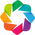

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from tqdm import tqdm
import holoviews as hv
import panel as pn
hv.extension('bokeh')
import os

Step one to initialization is to define the initial conditions for the three model variables in this project: $u$, the x component of velocity; $w$, the y component of velocity; and $p$, the pressure. The initial condition for each of these variables is defined across each dimension of computational mesh, and is later summed together, allowing for complex initial conditions to be tested. For this example, functions should simply be set to `lambda x: x*0`, which will set the initial conditions for each variable and across each dimension to zero. In plain english, this means that at the beginning of the simulation, the fluid is perfectly still with no pressure gradients.

In [2]:
ufunc_x = lambda x: x*0
ufunc_y = lambda y: y*0
wfunc_x = lambda x: x*0
wfunc_y = lambda y: y*0
pfunc_x = lambda x: x*0
pfunc_y = lambda y: y*0

Below is listed a definition for all of the parameters and some notes about the default values:
- `model_type`: 
In this implementation, `'navier_stokes'` is the only option. In future implementations, simulation configurations will be stored as instances of a `Config` class, with specific `model_type` string signature controlling the behavior of the `__init__` dunder method, allowing for cleaner code. However here, it is only a placeholder and does not change behavior.

- `coords`: 
This parameters defines the coordinates of the grid in space and in time. Creating this variable as a dictionary is convenient, as it is the exact format used in XArray's DataArray `coord=` argument, which is used to store the datacube generated by the simulation.

- `domain_size`:
The number of discrete grid points along both the x- and y- directions. For simplicity, this implementation does not support irregular grids.

- `dt`:
This is the time step. Not recommended to change as Courant-Friedrichs-Lewy condition for stability could be violated. Of course, in an exploratory framework, this is encouraged, but the recommended settings will produce actual results.

- `Ndt`:
The number of discrete time points. This can be changed pretty freely, taking into consideration that very large values will result in longer computational times.

- `ics`:
ics stands for *I*nitial *C*ondition*S*, and should be set as a tuple of tuples, the inset tuples represent each variable for which an initial condition should be set ($u$,$w$,$p$), and the values within should hold the lambda functions which will map those values across each dimension (x, then y, in order).

- `bcs`:
bcs stands for *B*oundary *C*ondition*S*, and should be set as a tuple of tuples, similar to the initial conditions. This time, instead of the inset tuples representing each variable, they will represent the four sides of the computational mesh with the values representing the velocity to be set ($u$, then $w$, in order). The boundary condition for $p$ is omitted here and is instead hard-coded into the algorithm. This is becuase the pressure boundary condition is more complicated (homogeneous Neumann), reliant on the pressure from the previous time step, and is more difficult to implement within this current implementation of the framework.

- `Kviscosity`:
This is the kinematic viscosity of the fluid. This value should be changed with caution as it can cause the CFL condition to be violated at very small values. Higher values essentially indicates a "stickier" fluid.

- `forcings`:
A placeholder in this implementation. In future implementations, users will be allowed to specify where and when a force is to be added to any given cell by creating a space-time cube dataset of the specific force values.

- `density`:
The density of the fluid. This should remain at 1.

- `poisson_iterations`:
The number of iterations that the pressure poisson solver will iterate through, more interations will allow the solver to converge closer to the true solution, preventing error from propogating.

- `CFL_condition`:
The value that the Courant-Friedrichs-Lewy condition for stability will be checked against after each time integration, for explicit schemes this is typically set to 1.

The parameters are commented out here becuase they will be initialized later in the notebook, where it is easier to scroll back and change things.

In [3]:
# model_type = 'navier_stokes'
# domain_size = 1
# Nx = 64
# dt = 0.001
# Ndt = 10
# ics = ((ufunc_x,ufunc_y),(wfunc_x,wfunc_y),(pfunc_x,pfunc_y))
# bcs = ((0,0),(0,0),(1,0),(0,0))
# Kviscosity = 0.1
# forcings = None
# density = 1.0
# poisson_iterations = 50
# CFL_condition = 1

In [4]:
def initialize_t0(initial_conditions, by_dimension, *args):
    """
    initial_conditions = tuple of tuples of form ((u_icx,uicy),(w_icx,w_icy),(p_icx,p_icy))
    by_dimensions = bool, if True, lambda functions in `initial_conditions` is applied by dimension
    *args = the coordinate arrays `X` and `Y` created from np.meshgrid()
    """
    
    if by_dimension is True:
        variables_initcond = []

        for variable in initial_conditions:
            dim_counter = 0
            intermediate = np.zeros_like(args[0])

            for dimension in args:
                intermediate += variable[dim_counter](dimension)
                dim_counter += 1
            variables_initcond.append(intermediate)
    
    else:
        variables_initcond = [initial_conditions[0](np.zeros_like(args[0])) for _ in initial_conditions]
    
    return variables_initcond

Next we will create the function that is responsible for initializing our coordinate arrays, applying intial conditions from the lambda functions described above(propogating the initial conditions across the grid seperately for each dimension), and initializing the XArray DataArray object to store data. This function will allow us to build three XArray DataArray objects, each representing the computational mesh at each $\Delta t$ for one of the three dependent variables in the simulation; the x-velocity component $u$, the y-velocity component $w$, and the pressure $p$.

In [5]:
def create_arrays(coords, ics, bcs):
    """
    Takes in coords, ics, bcs
    """
    X, Y = np.meshgrid(coords['xdim'], coords['ydim'], copy=True)
    # a copy is made here becuase the original 1D coordinate arrays shouldn't have the 
    # potential to be modified
    shape = tuple(coords[key].shape[0] for key in coords.keys())
    dims = list([key for key in coords.keys()])

    uxarr = xr.DataArray(np.zeros(shape),dims=dims,coords=coords)
    wxarr = xr.DataArray(np.zeros(shape),dims=dims,coords=coords)
    pxarr = xr.DataArray(np.zeros(shape),dims=dims,coords=coords)

    # Enforce initial conditions
    u_t_0, w_t_0, p_t_0 = initialize_t0(ics,True, X, Y)

    uxarr.data[:,:,0] = u_t_0
    wxarr.data[:,:,0] = w_t_0
    pxarr.data[:,:,0] = p_t_0
    # Enforce boundary conditions
    # uxarr[:,:,0], wxarr[:,:,0] = enforce_bc(bcs, uxarr[:,:,0].data, wxarr[:,:,0].data)

    return uxarr, wxarr, pxarr

### Boundary Conditions

Now we need a method to apply the boundary conditions. As stated in the project goals, this notebook should be a framework for how modular GFD simulation can be improved upon in the future, and in that spirit, the `apply_boundary_conditions` function is created, which can be called to initialize, or can be called in the context of a time-stepping loop.

In [6]:
def enforce_bc(conditions, u, w):
    """
    Takes in a tuple of tuples (`conditions`) in the form ((left_u, left_w), (right_u, right_w), (top_u, top_w), (bottom_u, bottom_w))
    representing the assigned x and y velocity components for each boundary.

    Also takes in additional arguements which are the scalar or vector field upon which we will be assigning boundary conditions
    to, these will be `u` and `w`.

    Returns a list of vector fields which can be unpacked via direct assignment.
    """

    left_U, right_U, top_U, bottom_U = conditions # unpack boundary conditions for improved readability

    u_new = u.copy()
    w_new = w.copy()
    
    # bottom boundary conditions
    u_new[-1,:] = bottom_U[0]
    # left boundary conditions
    u_new[:,0] = left_U[0]
    # right boundary conditions
    u_new[:,-1] = right_U[0]
    # top boundary conditions
    u_new[0,:] = top_U[0]
    
    # bottom boundary conditions
    w_new[-1,:] = bottom_U[1]
    # left boundary conditions
    w_new[:,0] = left_U[1]
    # right boundary conditions
    w_new[:,-1] = right_U[1]
    # top boundary conditions
    w_new[0,:] = top_U[1]

    return u_new, w_new

### Solver Functions

The following cell defines the functions required to perform a central difference derivative in the x- and y- dimensions. These will be used to calculate $\frac{\partial u}{\partial x}$ and $\frac{\partial w}{\partial y}$, among others. In addition to the central difference scheme, there are other ways to algorithmically approximate a discrete derivative such as forward difference and backwards difference. As this project matures, more methods will become available for experimentation.

In [7]:
def x_cen_diff(f,dxy):
    """
    Takes in dxy
    """
    func = f.copy()
    diff = np.zeros_like(func)
    diff[1:-1, 1:-1] = (func[1:-1, 2:] - func[1:-1, :-2]) / (2*dxy)
    return diff

def y_cen_diff(f,dxy):
    """
    Takes in dxy
    """
    func = f.copy()
    diff = np.zeros_like(func)
    diff[1:-1, 1:-1] = (func[:-2, 1:-1]-func[2:, 1:-1]) / (2*dxy)
    return diff

# and a quick funtion to make our lives easier and calculate all spatial derivative at the same time
def calculate_spatial_derivatives(vars, dxy):
    """
    Takes in dxy
    """
    if len(vars) == 1:
        differentiated_x = x_cen_diff(vars[0],dxy)
        differentiated_y = y_cen_diff(vars[0],dxy)
        return differentiated_x, differentiated_y
    elif len(vars) == 2:
        arrays = []
        for dim in vars:
            differentiated_x = x_cen_diff(dim, dxy)
            differentiated_y = y_cen_diff(dim, dxy)
            arrays.append(differentiated_x)
            arrays.append(differentiated_y)
        return arrays

Along with functions to calculate the central difference derivative, we will also need a function to calculate the laplacian operator $\nabla^2$.

The discrete approximation is:  
  
$\nabla^2 f \approx \frac{f_{i, j-1} + f_{i-1, j} - 4f_{i, j} + f_{i, j+1} + f_{i+1, j}}{\text{element length}^2}$  
  
The use of the laplacian operator is shown in the equations in part 2.

In [8]:
def calculate_laplacian(f, dxy):
    """
    Takes in dxy
    """
    diff = np.zeros_like(f)
    a = f[1:-1, :-2].copy() # i , j-1
    b = f[2:, 1:-1].copy() # i-1 , j
    c = f[1:-1, 1:-1].copy() # i , j
    d = f[1:-1, 2:].copy() # i , j+1
    e = f[:-2, 1:-1].copy() # i+1 , j
    core = (a + b - 4 * c + d + e) / (dxy**2)
    diff[1:-1,1:-1] = core
    return diff

#### Compute tentative velocities ($u^{*}$, $w^{*}$)
Now we need a function designed to advect the fluid parcel on a pixel by pixel basis using the derivatives and the velocities at this current time step. As discussed above, we ignore the pressure, so we call these velocities *tentative*. Later we will calculate the pressure gradient by solving the pressure Poisson equation and correct our tentative velocities to what they should be, therefore abiding by the incompressibility criteria.

Now we will build a function to advect the velocities from $t_n$ to their tentative velocities at $t_{n+1}$.

In [9]:
def advect(u_prev, w_prev, dt, Kviscosity, du_dx, du_dy, dw_dx, dw_dy, lapl_u, lapl_w):
    """
    Takes in u, v, dt, Kviscosity, du_dx, du_dy, dw_dx, dw_dy, laplace_u, laplace_w
    """
    u_tent = (u_prev + (dt * (-1*(u_prev * du_dx + w_prev * du_dy) + Kviscosity * lapl_u)))
    w_tent = (w_prev + (dt * (-1*(u_prev * dw_dx + w_prev * dw_dy) + Kviscosity * lapl_w)))

    return u_tent, w_tent

After the fluid has been advected with the `advect` function, it still is not satisfying the second equation in the Navier-Stokes system of partial differential equations. There is still the *incompressibility condition*, $\nabla \cdot U = 0$, which needs to be solved. This is done through the Pressure Poisson Equation, which we will now construct a function to solve.

In [10]:
def solve_ppe(p_prev, du_dx, dw_dy, dxy, dt, density, poisson_iterations):
    """
    Takes in dxy, dt, density, poisson_iterations
    """

    rhs = (density / dt * (du_dx + dw_dy)) # right-hand-side

    for _ in range(poisson_iterations):
        p_next = np.zeros_like(p_prev)

        p_next[1:-1, 1:-1] = 1/4 * (p_prev[1:-1, 0:-2] + p_prev[2:, 1:-1] + p_prev[1:-1, 2:  ] + p_prev[:-2, 1:-1] - dxy**2 * rhs[1:-1, 1:-1])

        # Homogeneous Dirichlet boundary condition at the top

        # Pressure Boundary Conditions: Homogeneous Neumann Boundary
        # conditions everywhere except for the top, where it is a 
        # homogeneous Dirichlet BC
        p_next[:,  0] = p_next[:,  1] # LEFT
        p_next[:, -1] = p_next[:, -2] # RIGHT
        p_next[-1,  :] = p_next[-2,  :] # BOTTOM
        p_next[0, :] = 0.0 # TOP

        p_prev = p_next
    
    return p_next

After the pressure poisson equation is solved, the derivative of the pressure field can be calculated and, from that, the tentative velocity field is corrected to the true velocities at $t_{n+1}$, the following function `enforce_incompressibility` takes in the pressure derivatives from the Pressure Poisson equation and outputs the corrected velocities:

In [11]:
def enforce_incompressibility(velocities, dp, dt, density):
    """
    Inputs: list of velocity fields of form [u, w], list of pressure derivative fields of form [dp_dx, dp_dy]

    Ouputs: list of corrected velocity fields of form [u_corrected, w_corrected] which can be unpacked via direct
    assignment

    Takes in dt, densit
    """

    arrays = []
    for vel, dp_i in zip(velocities, dp):
        vel_next = (vel - dt / density * dp_i)
        arrays.append(vel_next)
    return arrays

#### A quick note on numerical stability
The stability of a simulation is of great importance. In the time integration of the Navier-Stokes equations on a discrete grid, information can travel "too fast" depending on the chosen $\Delta t$, $\Delta x$, and $\nu$. In order to avoid this, or at least catch it when it occurs so we know how to update our configuration, the Courant-Friedrichs-Lewy condition for stability is used iteratively at each pixel for each time integration. If a pixel is identified as failing the condition, an Error is raised and the program stops running. Additionally, to better visualize how error propogates and to get a better intuitive understanding of the algorithmic basis of this model, the CFL value for each pixel at each time step will be recorded, and made available for further data analysis and plotting. The Courant-Friedrichs-Lewy condition for stability is expressed as so:

- $C=\frac{\Delta t}{\Delta x}u+\frac{\Delta t}{\Delta y}w\leq C_{max}$
  
- where $C_{max}$ is typically 1 for explicit schemes, but this number can be experimented with.

In [12]:
def CFL(CFL_condition, u, w, dxy, dt):
    """
    This function checks whether the velocity field is meeting the Courant-Friedrichs-Lewy condition for stability

    Takes in dxy, dt
    """
    C = ((dt/dxy)*u)+((dt/dxy)*w)
    C_max = np.max(C)

    check = C_max <= CFL_condition

    return C, C_max, check

### Time Integration
The following function puts all the steps together into a time-stepping scheme:

In [13]:
def sim(ics, bcs, domain_size, Nx, dt, Ndt, density, Kviscosity, poisson_iterations, CFL_condition, plot):
    """
    ics, bcs, domain_size, Nx, dt, density, Kviscosity, poisson_iterations, CFL_condition, plot (bool)
    """

    # Create XArray DataArray for dependent variables u, w, p
    coords = {'xdim':np.linspace(0.0,domain_size,Nx),'ydim':np.linspace(0.0,domain_size,Nx),'tdim':np.arange(0.0,Ndt,dt)}
    uxarr, wxarr, pxarr = create_arrays(coords, ics, bcs)

    # Create XArray DataArray for Vorticity and CFL Data
    cxarr = xr.DataArray(np.zeros_like(uxarr.data[:,:,:]), dims=list([key for key in coords.keys()]), coords=coords)
    vxarr = xr.DataArray(np.zeros_like(uxarr.data[:,:,:]), dims=list([key for key in coords.keys()]), coords=coords)

    n_iterations = len(coords['tdim'])
    dxy = domain_size / (Nx-1)

    for t in tqdm(range(n_iterations-1)):

        # Pre-emptive step: extract data from XArray DataArray for current time-step
        if t == 0:
            u = uxarr.data[:,:,t].copy()
            w = wxarr.data[:,:,t].copy()
            p = pxarr.data[:,:,t].copy()
        
        # Step 1: calculate spatial derivatives and laplacian for u and w
        du_dx = x_cen_diff(u, dxy=dxy)
        du_dy = y_cen_diff(u, dxy=dxy)
        dw_dx = x_cen_diff(w, dxy=dxy)
        dw_dy = y_cen_diff(w, dxy=dxy)
        laplace_u = calculate_laplacian(u,dxy=dxy)
        laplace_w = calculate_laplacian(w,dxy=dxy)

        # Step 2: advect velocities to tentative velocities at tn+1, ignoring pressure term
        u_tent, w_tent = advect(u_prev=u, w_prev=w, dt=dt, Kviscosity=Kviscosity, du_dx=du_dx, du_dy=du_dy,
                                dw_dx=dw_dx, dw_dy=dw_dy, lapl_u=laplace_u, lapl_w=laplace_w)

        # Step 3: Enforce boundary conditions on tentative velocities
        u_tent_bc, w_tent_bc = enforce_bc(bcs, u_tent, w_tent)

        # Step 4: calculate spatial derivatives for tentative u and w
        du_tent_dx = x_cen_diff(u_tent_bc, dxy=dxy)
        dw_tent_dy = y_cen_diff(w_tent_bc, dxy=dxy)

        # Step 5: Solve Pressure Poisson Equation (PPE), solving pressure boundary conditions at each iteration
        p_final = solve_ppe(p, du_tent_dx, dw_tent_dy, dxy=dxy,dt=dt, density=density, poisson_iterations=poisson_iterations)
        
        # Step 6: Calculate spatial derivatives for pressure field
        dp_dx = x_cen_diff(p_final, dxy=dxy)
        dp_dy = y_cen_diff(p_final, dxy=dxy)

        # Step 7: Enforce compressibility with solved PPE
        u_enforced, w_enforced = enforce_incompressibility([u_tent_bc, w_tent_bc],[dp_dx, dp_dy], dt=dt, density=density)

        # Step 8: Enforce boundary conditions on corrected velocities
        u_final, w_final = enforce_bc(bcs, u_enforced, w_enforced)

        # Step 9: Check admissability with CFL condition:
        C_field, cmax, check = CFL(CFL_condition, u_final, w_final, dxy=dxy, dt=dt)
        
        # Step 10: Calculate vorticity
        vorticity = x_cen_diff(w_final, dxy=dxy) - y_cen_diff(u_final, dxy=dxy)
        
        if check:
            uxarr.data[:,:,t+1] = u_final
            wxarr.data[:,:,t+1] = w_final
            pxarr.data[:,:,t+1] = p_final
            vxarr.data[:,:,t+1] = vorticity
            cxarr.data[:,:,t+1] = C_field
            u = u_final
            w = w_final
            p = p_final
        else:
            if plot:
                plt.figure(1, figsize=(30,10))
                plt.subplot(1,2,1)
                plt.pcolormesh(C_field)
                plt.colorbar()
                plt.gca().invert_yaxis()
                plt.title('Courant-Friedrichs-Lewy condition values')
                plt.xlabel('$j$')
                plt.ylabel('$i$')
                plt.subplot(1,2,2)
                plt.gca().invert_yaxis()
                plt.pcolormesh(p_final)
                plt.colorbar()
                plt.quiver(u_final,w_final)
                plt.title('Colormesh of Pressure and Quiver plot of velocity')
                plt.xlabel('$j$')
                plt.ylabel('$i$')
                
            print(f'Courant-Friedrichs-Lewy condition failed at time t={t}, C={cmax}')
            return uxarr, wxarr, pxarr, vxarr, cxarr
    return uxarr, wxarr, pxarr, vxarr, cxarr

Now we have successfully created a function to run the entire simulation from start to finish. The cell below initialize the variables we will plug into the model, which were discussed at length at the beginning of section 2. The current settings are:
- initial conditions: zero everywhere
- boundary conditions: no-slip everywhere except the top which is prescribed (u=1,w=0)
- domain size: 1
- number of spatial grid points(x and y): 64
- time step: 0.001
- total time (seconds): 10
- Kinematic viscosity: 0.1
- density: 1.0
- iterations of Pressure Poisson solver: 50
- Courant-Friedrichs-Lewy maximum condition: 1

These model setting are fairly arbitrary, and in later sections we will explore how changing these paramters can change the model output. For now lets run it has it is and see what happens.

In [28]:
# Run this cell first . . .
model_type = 'navier_stokes'
domain_size = 10
Nx = 100
dt = 0.005
Ndt = 50
ics = ((ufunc_x,ufunc_y),(wfunc_x,wfunc_y),(pfunc_x,pfunc_y))
bcs = ((0,0),(0,0),(1,0),(0,0))
Kviscosity = 0.005
forcings = None
density = 1.0
poisson_iterations = 10
CFL_condition = 1

In [29]:
# . . . Then this cell second
uxarr, wxarr, pxarr, vxarr, cxarr = sim(ics=ics,
    bcs=bcs,
    domain_size=domain_size,
    Nx=Nx,
    dt=dt,
    Ndt=Ndt,
    density=density,
    Kviscosity=Kviscosity,
    poisson_iterations=poisson_iterations,
    CFL_condition=CFL_condition, plot=True)

100%|██████████| 9999/9999 [00:26<00:00, 370.90it/s]


Now we have created 5 seperate XArray DataArrays that store values that describe the fluid evolution for the entire progression of the simulation; `uxarr` stores the x-component of the fluid velocity, `wxarr` stores the y-component of the fluid velocity, `pxarr` stores the pressure values, `vxarr` stores the calculated vorticity of the fluid, and `cxarr` stores the calculated Courant-Friedrichs-Lewy condition values.

Lets plot the final iteration of the simulation as a sniff-test:

Text(0, 0.5, '$i$')

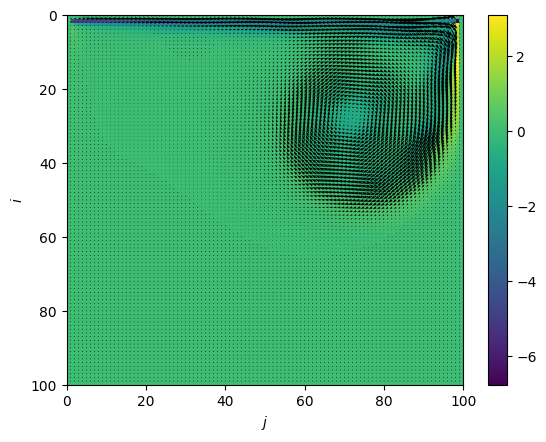

In [30]:
plt.pcolormesh(vxarr.data[:,:,-1])
plt.colorbar()
plt.quiver(uxarr.data[:,:,-1],wxarr.data[:,:,-1])
plt.gca().invert_yaxis()
plt.xlabel('$j$')
plt.ylabel('$i$')

Looks good! But what we're really interested in is not so much the final state of the system (although this can certainly be a point of interest in many GFD applications), but rather the dynamics of the fluid evolution. Let's begin analyzing the dynamics by plotting the evolution of the simulation.

In [32]:
def plot_data3(index):
    data = vxarr.data[:,:,index]
    # bounds=(0, 0, 10, 10)
    return hv.Image(data).opts(
        colorbar=True,
        cmap='Viridis',
        clim=(data.min(), data.max()),
        width=400,
        height=400,
        tools=['hover']
    )



dmap3 = hv.DynamicMap(plot_data3, kdims=[hv.Dimension('Time Step (Index)', values=np.arange(1,Ndt/dt, dtype=int))])
pn.Column("# Plot of vorticity as a function of time", dmap3).servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'419a86bb-111d-42a0-8eeb-6b86d4388c0f': {'version…

By moving the sliding bar labeled "Time Step (Index): ----" to the right, we can evolve the simulation in time and see how the vorticity changes. In this example, we can see some pretty interesting dynamics. In the first 4,000 or so time steps especially, we see these "waves" of vorticies or eddies travel along the lid of the cavity and crash against the right wall. As they do so, they spill down the side of the cavity and end up merging together as one larger clockwise spinning vortex in the middle of the cavity. With the right hand rule, we can also double check that our vorticity calculations are correct--for a clockwise rotating fluid the vorticity should be negative (it should be noted that in GFD this is specific to the Northern hemisphere, but this is an idealized simulation and coriolis forces are not taken into account...yet!), and indeed we see that this is the case. Yippie!!

## 4. Results and Visualization

Using `holoviews` and the ability of the `sim()` function to be put in a loop while iterating over configurations, we are able to look at the effect of changing parameters in a really accessible way. In the below cell, the values of `Nx` are iterated over, starting at 10 and increasing by 10 until 100 (this runs 10 iterations of `sim()`). As a reminder, `Nx` represents the number of grid points along each axis of the mesh, and it follows that the number of grid cells is $Nx^2$ within a equally spaced square mesh. `Nx` is a natural parameter to test first due to the inherent relationship between the Courant-Friedrichs-Lewy number and the grid spacing. Run the cell below to generate the data required to plot with `holoviews`.

### The effect of grid spacing on number of iterations to failure and CFL plot

In [ ]:
# Nx_list = np.arange(10,110,10, dtype=int)
# cfl_data_list = []
# C_field_list = []
# 
# for Nx1 in Nx_list:
#     uxarr, wxarr, pxarr, cfl_data, C_field = sim(ics=ics,
#                                         bcs=bcs,
#                                         domain_size=domain_size,
#                                         Nx=Nx1,
#                                         dt=dt,
#                                         Ndt=Ndt,
#                                         density=density,
#                                         Kviscosity=Kviscosity,
#                                         poisson_iterations=poisson_iterations,
#                                         CFL_condition=CFL_condition,
#                                         plot=False)
#     cfl_data_list.append(cfl_data)
#     C_field_list.append(C_field)

 84%|████████▍ | 8442/9999 [00:03<00:00, 2383.45it/s]


Courant-Friedrichs-Lewy condition failed at time t=8442, C=1.2657652245435145


 59%|█████▉    | 5915/9999 [00:03<00:02, 1821.09it/s]


Courant-Friedrichs-Lewy condition failed at time t=5915, C=1.0627205810297906


 58%|█████▊    | 5774/9999 [00:03<00:02, 1556.62it/s]


Courant-Friedrichs-Lewy condition failed at time t=5774, C=1.09586109930289


 58%|█████▊    | 5771/9999 [00:04<00:03, 1197.64it/s]


Courant-Friedrichs-Lewy condition failed at time t=5771, C=1.0221574171265018


 60%|█████▉    | 5950/9999 [00:05<00:04, 999.64it/s] 


Courant-Friedrichs-Lewy condition failed at time t=5950, C=1.1240822776141184


 68%|██████▊   | 6805/9999 [00:08<00:03, 835.52it/s]


Courant-Friedrichs-Lewy condition failed at time t=6805, C=1.1493667689677105


100%|██████████| 9999/9999 [00:24<00:00, 413.13it/s]


The below cell defines a plot function with `holoviews` and inserts it into the `DynamicMap` class to create an interactive colorplot of the CFL values at failure for 10 different values of `Nx`. The values of `Nx` are by index position, and the real value of `Nx` can be easily calculated with: $10(Nx+1)$. 

In [ ]:
# def plot_data(index):
#     data = C_field_list[index]
#     return hv.Image(data, bounds=(0, 0, 10, 10)).opts(
#         colorbar=True,
#         cmap='Viridis',
#         clim=(data.min(), data.max()),
#         width=400,
#         height=400,
#         tools=['hover']
#     )
# 
# dmap = hv.DynamicMap(plot_data, kdims=[hv.Dimension('Nx', values=[0,1,2,3,4,5,6,7,8,9])])
# # list(range(len(C_field_list)))
# pn.Column("# Plot of CFL values at failure based on number of grid points (Nx)", dmap).servable()

### The effect of Domain Size on number of iterations to failure and CFL plot

Now lets set `Nx` to constant and change the `domain_size` parameter to see if that changes the output any more than `Nx` does. Changing `domain_size` will allow us to keep the same grid resolution while simultaneously changing the $\Delta x$ and $\Delta y$ parameters. It is equivalent to changing the coordinate distance between each point on the grid.

In [ ]:
domain_size_list = [410,610,810,1010,1210,1410,1610,1810,2010,2210]
cfl_data_list = []
C_field_list = []

for domain_size_i in domain_size_list:
    uxarr, wxarr, pxarr, cfl_data, C_field = sim(ics=ics,
                                        bcs=bcs,
                                        domain_size=domain_size_i,
                                        Nx=41,
                                        dt=dt,
                                        Ndt=Ndt,
                                        density=density,
                                        Kviscosity=Kviscosity,
                                        poisson_iterations=poisson_iterations,
                                        CFL_condition=CFL_condition,
                                        plot=False)
    cfl_data_list.append(cfl_data)
    C_field_list.append(C_field)

In [ ]:
def plot_data2(index):
    data = C_field_list[index]
    return hv.Image(data, bounds=(0, 0, 10, 10)).opts(
        colorbar=True,
        cmap='Viridis',
        clim=(data.min(), data.max()),
        width=400,
        height=400,
        tools=['hover']
    )

dmap2 = hv.DynamicMap(plot_data, kdims=[hv.Dimension('Domain Size', values=list(range(71)))])
pn.Column("# Plot of CFL values at failure based on total length of coordinate axis (Domain Size)", dmap2).servable()

## 5. Discussion

The simulations did not result in stable numerical solutions to the Navier-Stokes equations in this configuration. As indicated by calculating the Courant-Friedrichs-Lewy condition for stability across the grid, and then plotting the resulting colormap for iterations at failure across a few different configurations, the simulation was only stable for a limited amount of time (anywhere between 50-250 iterations) before the derivatives of the vector field blew up. This is an unfortunate outcome, but understanding can still be gleamed from what we have.  
  
Interestingly, as we increased the number of grid points (effectively decreasing $\Delta x$ and $\Delta y$), we can note a few things that are different from when we increased the total spatial span of the grid (effectively increading $\Delta x$ and $\Delta y$). Firsly, when we increased the number of grid points (`Nx`), it was possible to see from the print statement that the time to failure was decreasing by almost a third as much, whereas when we increased the total spatial span of the grid the time to failure increased. This does make sense in the context of the CFL equation presented earlier:  
  
$C=\frac{\Delta t}{\Delta x}u+\frac{\Delta t}{\Delta y}w\leq C_{max}$
  
When the spatial dimension is *decreased* (as is the case with increasing grid resolution for the same spatial span), we are increasing the $\frac{\Delta t}{\Delta (x,y)}$ term because the spatial step is in the demoninator, effectively decreasing the maximum velocity that can be achieved before breaking the condition. This is why we see a decrease in the time to failure when we increase grid resolution. And vice-versa for *increasing* the spatial dimension via increasing the total spatial span (leaving grid resolution constant).  
  
Finally, we can see from the interactive color plots created with `holoviews` that when we increase the spatial span, there is no noticeable change in the location of the CFL value anomolies within the mesh, whereas this is starkly opposed to what we observe when we change the mesh resolution by changing `Nx`. As we increase the grid resolution, the CFL anomolies move closer and closer to top-right hand corner of the grid. This makes intuitive sense as this is where velocitiy and pressure would "pile up" as the fluid is advected to the right during each time integration.

### A note on future Work

As mentioned in the introduction, this notebook will be one in a series of running attempts to generalize toy fluid dynamics models for the purpose of hands-on, self-directed, intuitive learning of topics in Geophysical Fluid Dynamics. To that end, additional capabilities are in the works to be added, including the ability to perform data-driven science and engineering workflows to the data generated by these models. Modal decompositions, for example, could be an interesting way to represent a toy model of flow past a cylindar and would help encapsulate the dynamics of vortex shedding (one of many phenomenon which could be observed), and which has direct applications to GFD. PySINDy is another module that I would like to also incorporate in the future, developed by Brunton et al. [2] PySINDy is the Python implementation of SINDy (Sparse Identification of Nonlinear Dynamics), an algorithm that has been shown to be able to identify the sparse terms associated with systems like incompressible Navier-Stokes and the Lorenz system of ODEs from data alone.

## 6. Data-Driven Science and Engineering

In this section, we will explore some bleeding edge techniques in the realm of data-driven science and engineering to further our understanding of this fluid system, the Navier-Stokes equations, and dynamical systems more broadly. This section is of particular personal excitement to me, and I hope you come to share my enthusiasm for this wonderful realm of mathematics and physics. But first, what does "data-driven science and engineering mean"? Well, so far we've created a few datasets resolved in space and time that show the evolution of a fluid based on the numerical analysis of equations derived from first principles. That's great, and we even were able to visualize it! But what about the literal _numbers_ themselves? Can we gleam any more information from this model-output dataset that we wouldn't be able to see simply by plotting? Using mathematics and physics-informed machine learning, what can we tease from the data? Let's find out together!

The first thing that I want to experiment with is an algorithm developed by the incredibly talented and inspiring Steve Brunton and his equally talented and inspiring colleagues Joshua Proctor and Nathan Kutz (seriously, check these guys out on YouTube, their work is amazing). The algorithm is called SINDy which stand for the **S**parse **I**dentification of **N**onlinear **Dy**namics, and which is able to be integrated into Python using the pySINDy package. What the SINDy algorithm is able to do is sparsely determine the underlying ODEs, PDEs, or systems thereof based on raw data alone. This should mean that we can feed the output of the Navier-Stokes based Lid-Driven Cavity Flow simulation into the SINDy algorithm and as an output it should spit out the Navier Stokes system of partial differential equations, **without ever having told the algorithm that the data was created from it**. Wow, how cool is that?! Additionally, the authors highlight the **sparsity** of the output of SINDy, so it's worth highlighting exactly what that means. Sparsity, in this case, means that the terms of the equation that SINDy gives us are as few as possible (but not too few). This follows one of the fundamental principles of physics and mathematics which is that you should try to explain everything as simple as possible, *but no simpler*. Anyway, let's try it out!

In [ ]:
# First lets import some more modules that we will need:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from scipy.io import loadmat
from pysindy.utils import linear_damped_SHO
from pysindy.utils import cubic_damped_SHO
from pysindy.utils import linear_3D
from pysindy.utils import hopf

import pysindy as ps

In [34]:
# Turn fluid flow data into dictionary
flow_data = {'u':uxarr.data, 'w':wxarr.data, 'p':pxarr.data}

In [ ]:
# TODO: Fill in the extraction of POD Modes

In [33]:
# TODO: Fill in SINDy Algorithm

## 7. References

1. Durran, D. R. . (1999). Numerical methods for wave equations in geophysical fluid dynamics. Springer International Publishing. 
  
2. S.L. Brunton, J.L. Proctor, & J.N. Kutz, Discovering governing equations from data by sparse identification of nonlinear dynamical systems, Proc. Natl. Acad. Sci. U.S.A. 113 (15) 3932-3937, https://doi.org/10.1073/pnas.1517384113 (2016).